# Multiple Linear Regression
## BoomBikes  Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19

Essentially, the company wants —


- To identify the variables affect  count of total rental bikes including both casual and registered.

- To create a linear model that quantitatively relates count of rental bikes booked  with variables.

- To know the accuracy of the model, i.e. how well these variables can predict count of bikes booked.


## Step 1: Reading and Understanding the Data 


In [5]:
# import all the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [6]:
bikes = pd.read_csv("./multilinearRegression/day.csv")

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bikes.set_index(['instant'],inplace=True)

In [10]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Removing the date because all other details are already present
bikes.drop(columns=['dteday'],inplace=True)

In [12]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - .
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

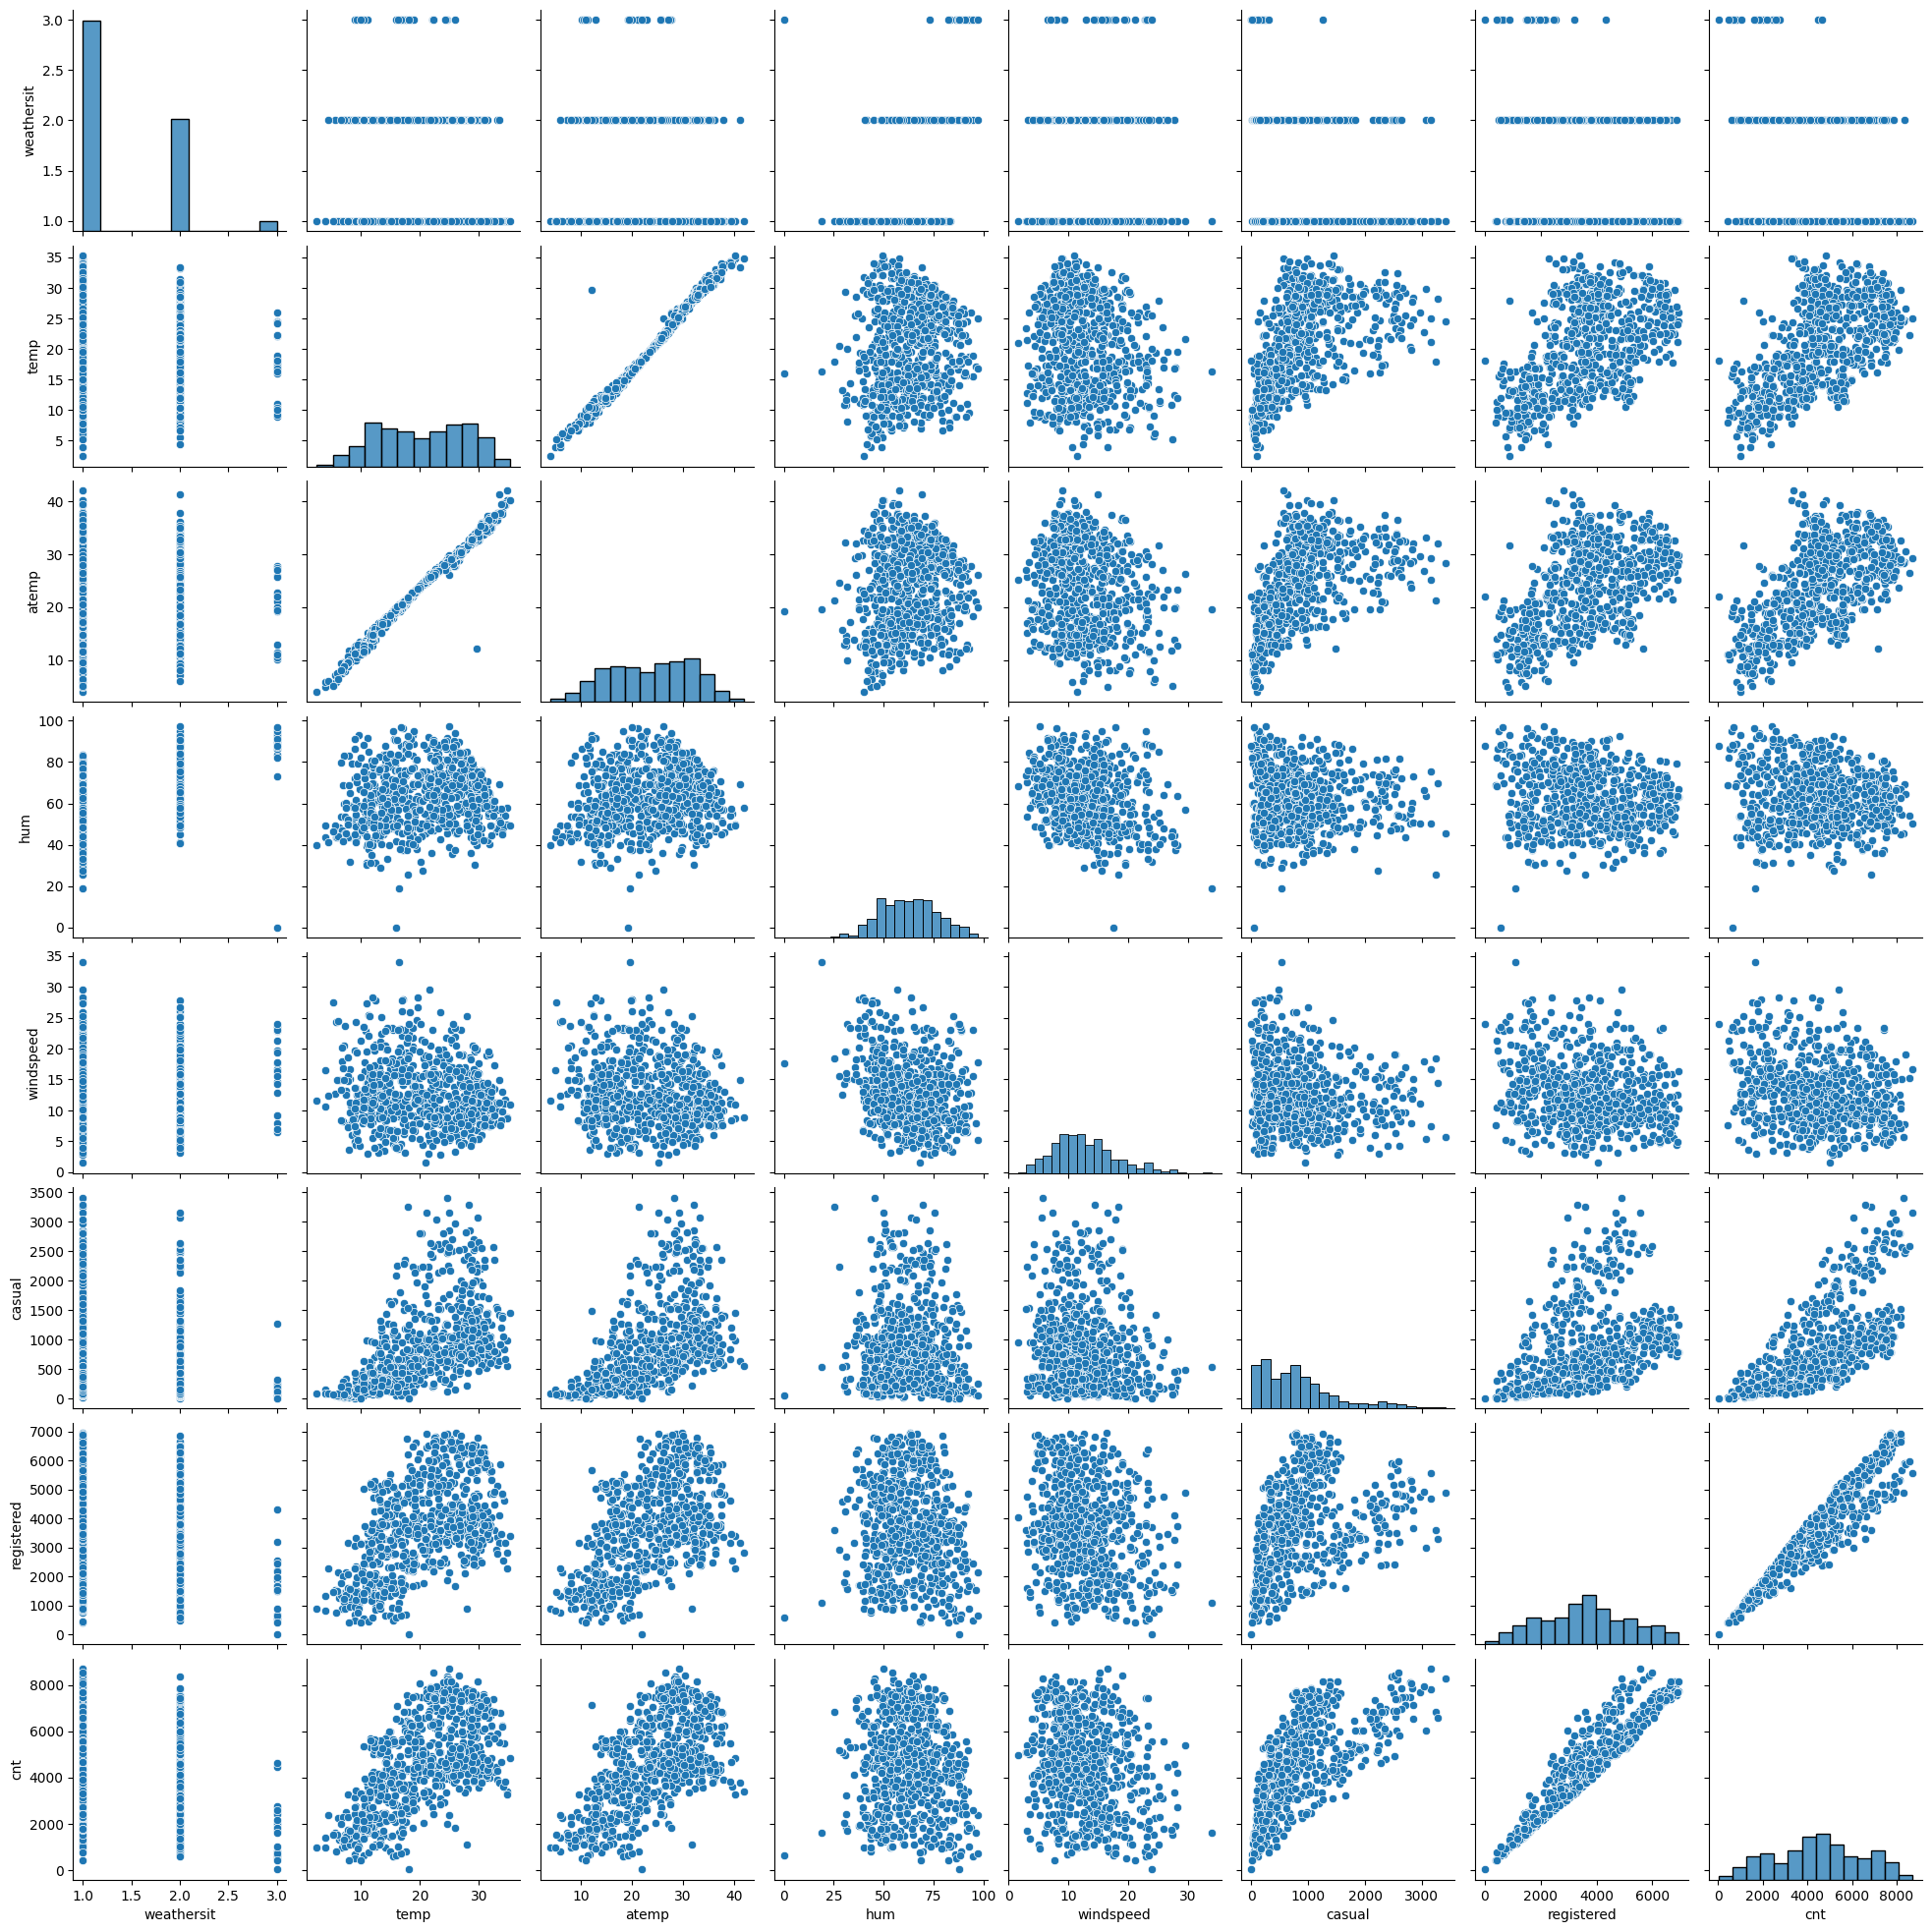

In [14]:
#Lets visualize all the non categorical data

sns.pairplot(bikes.iloc[:,6:])
plt.show()

From the above temp and atemp variable are closely related so it might hav high co variance

#### Visualising Categorical Variables


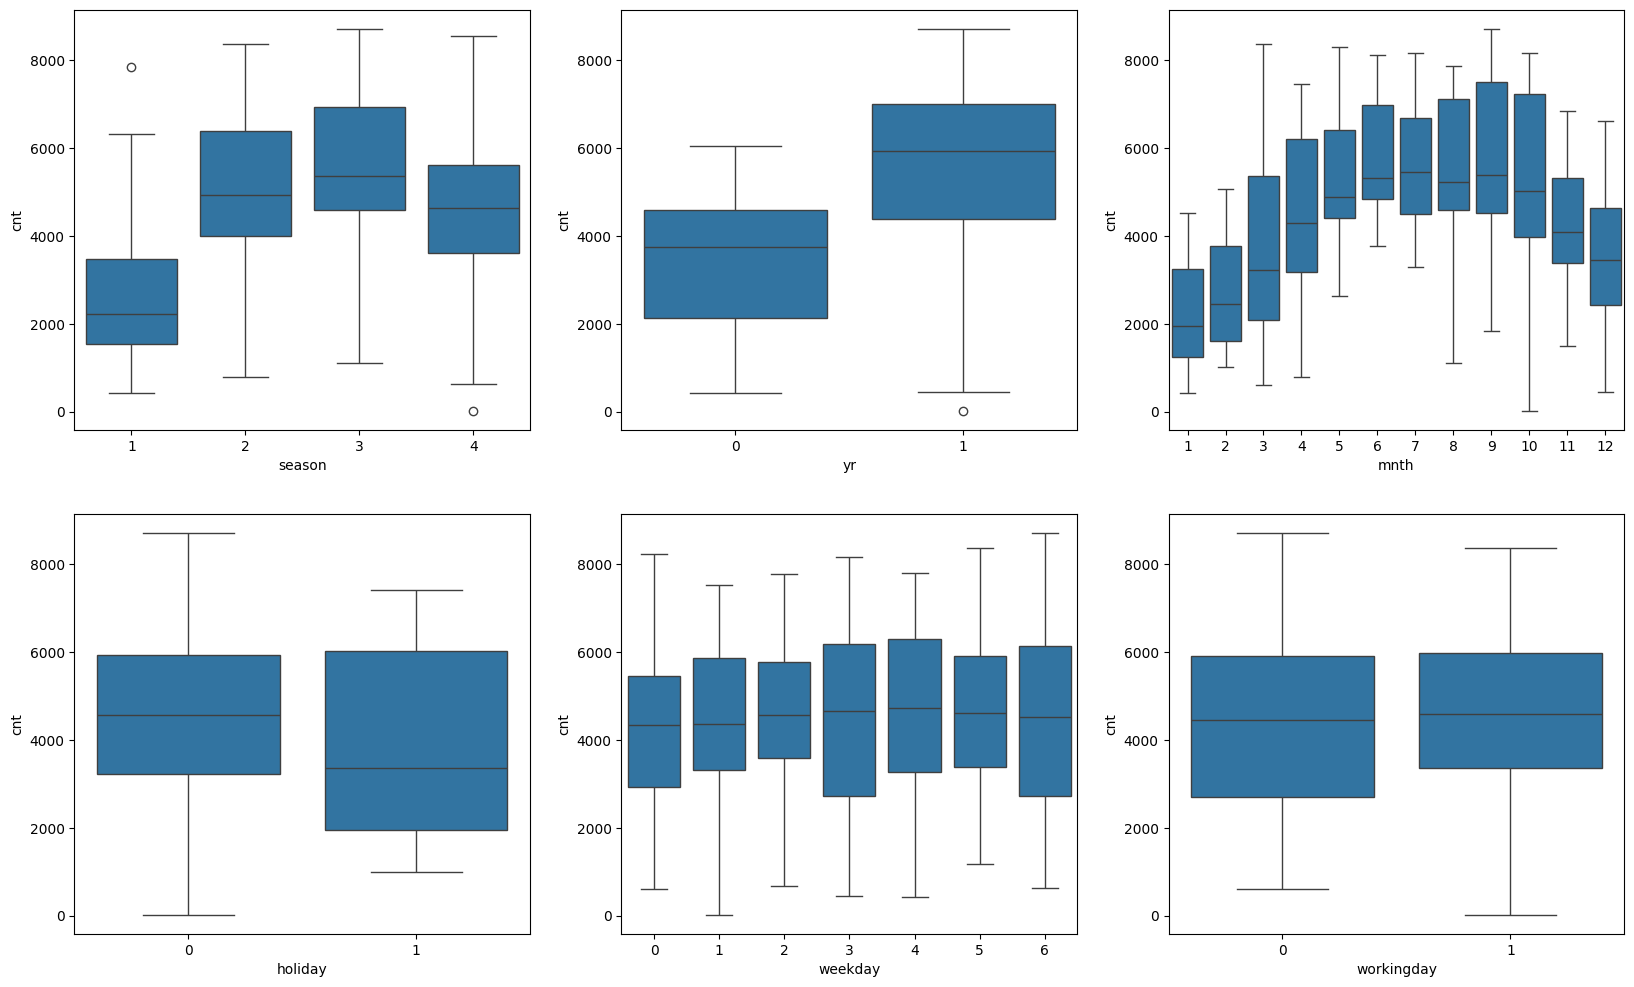

In [15]:

plt.figure(figsize=(20, 12))
listOfCategoricalData = bikes.iloc[:,:6].columns
for col in  listOfCategoricalData:
    plt.subplot(2,3,listOfCategoricalData.get_loc(col)+1)
    sns.boxplot(x = col, y = 'cnt', data = bikes)

The mean of weekday and working day and week day produces same across all

<Axes: xlabel='workingday', ylabel='cnt'>

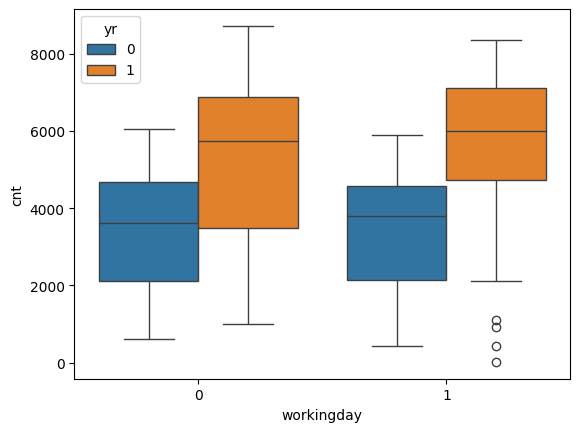

In [16]:
sns.boxplot(data= bikes,x='workingday',y= 'cnt',hue='yr')

<Axes: xlabel='mnth', ylabel='cnt'>

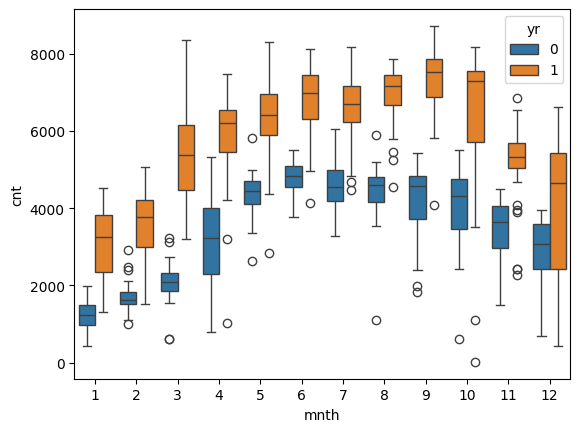

In [17]:
sns.boxplot(data= bikes,x='mnth',y= 'cnt',hue='yr')

The median of these are also same as the year graph where year was greater than 1 as same in above one

## Step 3: Data Preparation

In [18]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
bikes['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

### Dummy Variables

In [20]:
seasons = pd.get_dummies(bikes['season'], drop_first=True).rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'})
seasons.head()

,summer,fall,winter
instant,,,
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False


In [21]:
months = {	1:'Janauary',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'}
months = pd.get_dummies(bikes['mnth'],drop_first=True).rename(columns=months)
months.head()

,February,March,April,May,June,July,August,September,October,November,December
instant,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False


In [22]:
weekday = pd.get_dummies(bikes['weekday'],drop_first=True).rename(columns={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
instant,,,,,,
1,False,False,False,False,False,True
2,False,False,False,False,False,False
3,True,False,False,False,False,False
4,False,True,False,False,False,False
5,False,False,True,False,False,False


In [23]:
weathersit = pd.get_dummies(bikes['weathersit']).rename(columns={1: 'Clear',2: 'Mist',3:'Light Snow/Rain',4: 'Heavy Rain'})
# weathersit.head()


In [24]:
#Concatinating all the categoircal derived variables
bikes = pd.concat((bikes,pd.concat((months,seasons,weekday,weathersit),axis=1).astype(int)),axis=1)

In [25]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Clear,Mist,Light Snow/Rain
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,1,0
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,1,0,0


In [26]:
bikes.drop(columns=['season','mnth','weekday','weathersit','temp','casual','registered'],inplace=True,axis=1)

<Axes: >

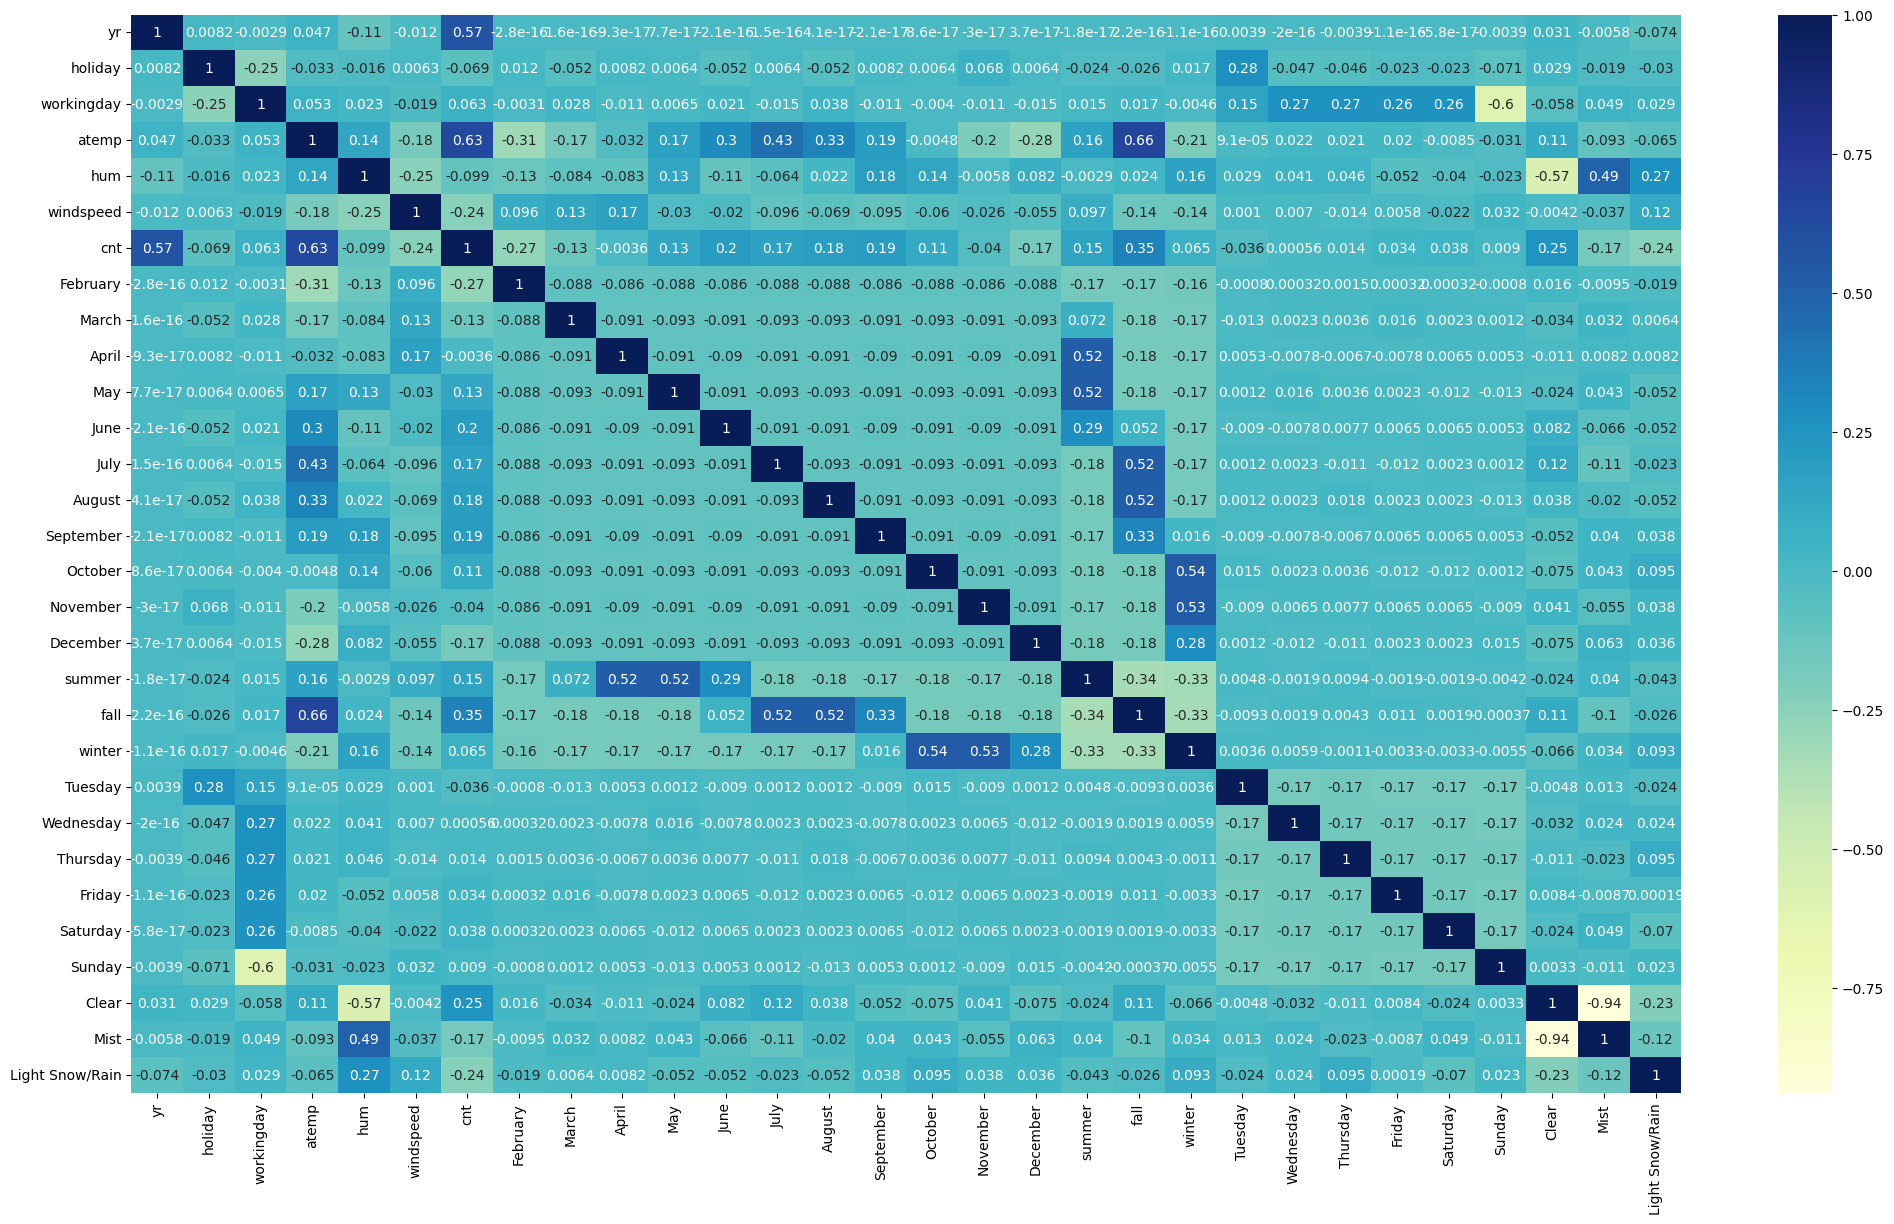

In [77]:
plt.figure(figsize = (25, 14))
sns.heatmap(bikes.corr(), annot = True, cmap="YlGnBu")


## Step 4: Splitting the Data into Training and Testing Sets
First basic step for regression is performing a train-test split.

In [28]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling will use MinMax scaling.


In [29]:
minScalar =  MinMaxScaler()

In [30]:
# Scaling the non categorical datas and getting the non categorical columns from below condition 
noncategoricalColums = bikes_train.loc[:,((bikes_train ==1) | (bikes_train ==0)).sum()!=bikes_train.shape[0]].columns

In [31]:
bikes_train[noncategoricalColums] = minScalar.fit_transform(bikes_train[noncategoricalColums])

In [32]:
bikes_train[noncategoricalColums].head()

,atemp,hum,windspeed,cnt
instant,,,,
654,0.501133,0.575354,0.300794,0.864243
577,0.766351,0.725633,0.264686,0.827658
427,0.438975,0.640189,0.255342,0.465255
729,0.200348,0.498067,0.663106,0.204096
483,0.391735,0.504508,0.188475,0.482973


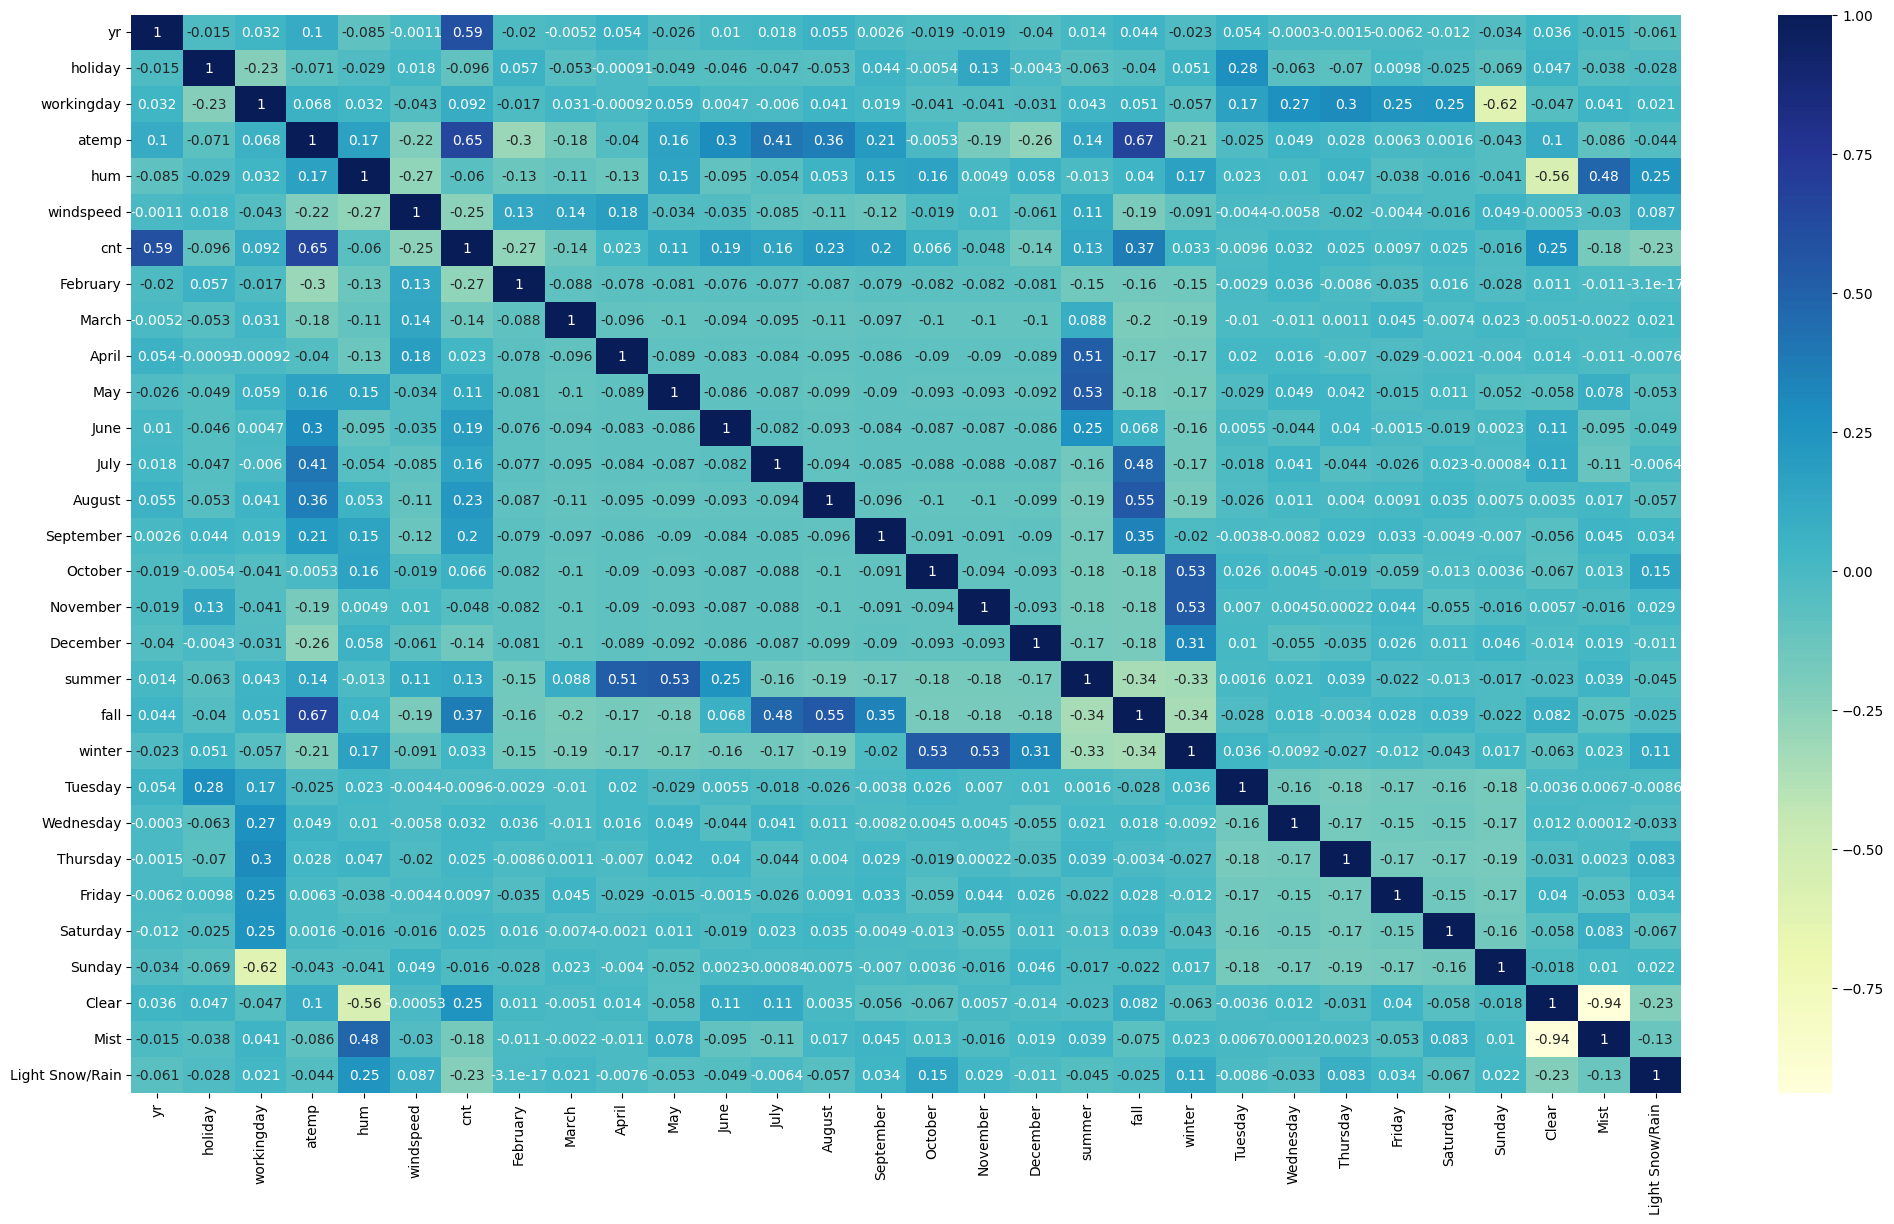

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 14))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see temp and atemp are closely related, temp and fall and etc

### Dividing into X and Y sets for the model building

In [34]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train
# X_train.info()

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [35]:
def  checkREFE(X_train, y_train,n):
    lr =  LinearRegression()
    lr.fit(X_train,y_train)
    rfe = RFE(lr,n_features_to_select=n)
    return rfe.fit(X_train, y_train)

In [36]:
rfe = checkREFE(X_train,y_train,16)
(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('February', False, 10),
 ('March', False, 6),
 ('April', False, 3),
 ('May', False, 2),
 ('June', False, 5),
 ('July', False, 7),
 ('August', False, 4),
 ('September', True, 1),
 ('October', False, 8),
 ('November', False, 12),
 ('December', False, 14),
 ('summer', False, 11),
 ('fall', False, 13),
 ('winter', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Thursday', True, 1),
 ('Friday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', False, 9),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light Snow/Rain', True, 1)]

In [37]:
rfeCol = X_train.columns[rfe.support_]
rfeCol

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'September',
       'winter', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Clear', 'Mist', 'Light Snow/Rain'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [38]:
X_train_new = X_train[rfeCol]
lm = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.27e-169
Time:                        18:47:04   Log-Likelihood:                 464.04
No. Observations:                 510   AIC:                            -898.1
Df Residuals:                     495   BIC:                            -834.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0843      0.027      3.127      0.002       0.031       0.137
yr                  0.2300      0.009     25.866      0.000       0.213       0.247
holiday            -0.0733      0.025     -2.907      0.004      -0.123      -0.024
workingday          0.0273      0.008      3.231      0.001       0.011       0.044
atemp               0.6204      0.023     26.703      0.000       0.575       0.666
hum                -0.1580      0.041     -3.845      0.000      -0.239      -0.077
windspeed          -0.1433      0.028     -5.116      0.000      -0.198      -0.088
September           0.0809      0.017      4.856      0.000       0.048       0.114
winter              0.1076      0.011      9.998      0.000       0.086       0.129
Tuesday            -0.0192      0.011     -1.814      0.070      -0.040       0.002
Wednesday          -0.0171      0.012     -1.407      0.160      -0.041       0.007
Thursday           -0.0017      0.011     -0.148      0.883      -0.024       0.021
Friday             -0.0117      0.012     -0.987      0.324      -0.035       0.012
Saturday            0.0037      0.012      0.302      0.763      -0.020       0.028
Clear               0.1240      0.009     13.439      0.000       0.106       0.142
Mist                0.0729      0.012      5.858      0.000       0.048       0.097
Light Snow/Rain    -0.1126      0.024     -4.687      0.000      -0.160      -0.065
==============================================================================
Omnibus:                       42.633   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.545
Skew:                          -0.433   Prob(JB):                     3.28e-23
Kurtosis:                       5.031   Cond. No.                     9.08e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

AS we can cleary see there more than 5 variable have high p value now lets c the VIF value of all columns remaining


In [40]:
def getVIF(X_train_new):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [41]:
getVIF(X_train_new)

c:\Users\Rajesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
8,Tuesday,inf
9,Wednesday,inf
10,Thursday,inf
11,Friday,inf
12,Saturday,inf
13,Clear,29.94
14,Mist,22.81
15,Light Snow/Rain,3.47


we can see the Thursday	 has high p value and VIF value lets drop it and build the model

In [42]:
X_train_new.drop(columns='Thursday',inplace=True)

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\1055870223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='Thursday',inplace=True)


In [43]:
# lets train the model again
lm1 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()

In [44]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.27e-169
Time:                        18:47:04   Log-Likelihood:                 464.04
No. Observations:                 510   AIC:                            -898.1
Df Residuals:                     495   BIC:                            -834.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0843      0.027      3.127      0.002       0.031       0.137
yr                  0.2300      0.009     25.866      0.000       0.213       0.247
holiday            -0.0750      0.032     -2.331      0.020      -0.138      -0.012
workingday          0.0257      0.014      1.876      0.061      -0.001       0.053
atemp               0.6204      0.023     26.703      0.000       0.575       0.666
hum                -0.1580      0.041     -3.845      0.000      -0.239      -0.077
windspeed          -0.1433      0.028     -5.116      0.000      -0.198      -0.088
September           0.0809      0.017      4.856      0.000       0.048       0.114
winter              0.1076      0.011      9.998      0.000       0.086       0.129
Tuesday            -0.0175      0.016     -1.079      0.281      -0.049       0.014
Wednesday          -0.0154      0.016     -0.941      0.347      -0.048       0.017
Friday             -0.0100      0.016     -0.611      0.541      -0.042       0.022
Saturday            0.0054      0.017      0.323      0.747      -0.027       0.038
Clear               0.1240      0.009     13.439      0.000       0.106       0.142
Mist                0.0729      0.012      5.858      0.000       0.048       0.097
Light Snow/Rain    -0.1126      0.024     -4.687      0.000      -0.160      -0.065
==============================================================================
Omnibus:                       42.633   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.545
Skew:                          -0.433   Prob(JB):                     3.28e-23
Kurtosis:                       5.031   Cond. No.                     1.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Clear and Saturday has the highest p value

In [45]:
getVIF(X_train_new)

,Features,VIF
12,Clear,29.94
13,Mist,22.81
14,Light Snow/Rain,3.47
2,workingday,2.14
4,hum,1.87
8,Tuesday,1.76
9,Wednesday,1.60
10,Friday,1.60
11,Saturday,1.60
1,holiday,1.34


In [46]:
#While comparing Clear has VIF >5 and Saturday high p value lets drop Clear

X_train_new.drop(columns='Clear',inplace=True) 

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\803179850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='Clear',inplace=True)


In [47]:
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()

In [48]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.27e-169
Time:                        18:47:04   Log-Likelihood:                 464.04
No. Observations:                 510   AIC:                            -898.1
Df Residuals:                     495   BIC:                            -834.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2083      0.030      6.886      0.000       0.149       0.268
yr                  0.2300      0.009     25.866      0.000       0.213       0.247
holiday            -0.0750      0.032     -2.331      0.020      -0.138      -0.012
workingday          0.0257      0.014      1.876      0.061      -0.001       0.053
atemp               0.6204      0.023     26.703      0.000       0.575       0.666
hum                -0.1580      0.041     -3.845      0.000      -0.239      -0.077
windspeed          -0.1433      0.028     -5.116      0.000      -0.198      -0.088
September           0.0809      0.017      4.856      0.000       0.048       0.114
winter              0.1076      0.011      9.998      0.000       0.086       0.129
Tuesday            -0.0175      0.016     -1.079      0.281      -0.049       0.014
Wednesday          -0.0154      0.016     -0.941      0.347      -0.048       0.017
Friday             -0.0100      0.016     -0.611      0.541      -0.042       0.022
Saturday            0.0054      0.017      0.323      0.747      -0.027       0.038
Mist               -0.0511      0.012     -4.431      0.000      -0.074      -0.028
Light Snow/Rain    -0.2366      0.029     -8.180      0.000      -0.293      -0.180
==============================================================================
Omnibus:                       42.633   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.545
Skew:                          -0.433   Prob(JB):                     3.28e-23
Kurtosis:                       5.031   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Saturday,Friday, Tuesday and working day have high p value  lets check VIF value
getVIF(X_train_new)

,Features,VIF
4,hum,15.66
3,atemp,8.21
2,workingday,6.46
5,windspeed,3.54
12,Mist,2.13
8,Tuesday,2.08
0,yr,2.03
10,Friday,1.85
9,Wednesday,1.84
11,Saturday,1.83


In [50]:
# Remove Saturday since it has very high p value
X_train_new.drop(columns='Saturday',inplace=True) 
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\1538411901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='Saturday',inplace=True)


In [51]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     164.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.44e-170
Time:                        18:47:04   Log-Likelihood:                 463.98
No. Observations:                 510   AIC:                            -900.0
Df Residuals:                     496   BIC:                            -840.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2086      0.030      6.909      0.000       0.149       0.268
yr                  0.2300      0.009     25.888      0.000       0.213       0.247
holiday            -0.0724      0.031     -2.328      0.020      -0.133      -0.011
workingday          0.0280      0.012      2.436      0.015       0.005       0.051
atemp               0.6204      0.023     26.729      0.000       0.575       0.666
hum                -0.1586      0.041     -3.867      0.000      -0.239      -0.078
windspeed          -0.1434      0.028     -5.124      0.000      -0.198      -0.088
September           0.0808      0.017      4.856      0.000       0.048       0.114
winter              0.1076      0.011     10.007      0.000       0.087       0.129
Tuesday            -0.0199      0.014     -1.383      0.167      -0.048       0.008
Wednesday          -0.0178      0.015     -1.218      0.224      -0.047       0.011
Friday             -0.0123      0.015     -0.848      0.397      -0.041       0.016
Mist               -0.0508      0.011     -4.423      0.000      -0.073      -0.028
Light Snow/Rain    -0.2372      0.029     -8.225      0.000      -0.294      -0.181
==============================================================================
Omnibus:                       42.008   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.024
Skew:                          -0.423   Prob(JB):                     4.25e-23
Kurtosis:                       5.033   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
getVIF(X_train_new)

,Features,VIF
4,hum,15.65
3,atemp,8.21
2,workingday,4.50
5,windspeed,3.54
11,Mist,2.12
0,yr,2.03
8,Tuesday,1.64
7,winter,1.50
10,Friday,1.48
9,Wednesday,1.46


In [53]:
# hum it has low p value and but has very high VIF lets remove it
X_train_new.drop(columns='hum',inplace=True) 

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\1323303810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='hum',inplace=True)


In [54]:
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     171.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.92e-168
Time:                        18:47:04   Log-Likelihood:                 456.41
No. Observations:                 510   AIC:                            -886.8
Df Residuals:                     497   BIC:                            -831.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1183      0.019      6.100      0.000       0.080       0.156
yr                  0.2336      0.009     26.073      0.000       0.216       0.251
holiday            -0.0718      0.032     -2.278      0.023      -0.134      -0.010
workingday          0.0290      0.012      2.481      0.013       0.006       0.052
atemp               0.5974      0.023     26.262      0.000       0.553       0.642
windspeed          -0.1142      0.027     -4.181      0.000      -0.168      -0.061
September           0.0763      0.017      4.533      0.000       0.043       0.109
winter              0.0998      0.011      9.320      0.000       0.079       0.121
Tuesday            -0.0219      0.015     -1.501      0.134      -0.051       0.007
Wednesday          -0.0191      0.015     -1.288      0.198      -0.048       0.010
Friday             -0.0116      0.015     -0.783      0.434      -0.041       0.017
Mist               -0.0764      0.010     -8.017      0.000      -0.095      -0.058
Light Snow/Rain    -0.2806      0.027    -10.419      0.000      -0.334      -0.228
==============================================================================
Omnibus:                       39.702   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.942
Skew:                          -0.443   Prob(JB):                     3.59e-19
Kurtosis:                       4.792   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
getVIF(X_train_new)

,Features,VIF
2,workingday,4.29
3,atemp,4.07
4,windspeed,3.09
0,yr,2.02
7,Tuesday,1.64
10,Mist,1.50
9,Friday,1.48
8,Wednesday,1.46
6,winter,1.28
1,holiday,1.26


In [56]:
# Remove Friday since it has very significance value
X_train_new.drop(columns='Friday',axis=1,inplace=True) 

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\1192925841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='Friday',axis=1,inplace=True)


In [57]:
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.79e-169
Time:                        18:47:04   Log-Likelihood:                 456.09
No. Observations:                 510   AIC:                            -888.2
Df Residuals:                     498   BIC:                            -837.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1181      0.019      6.096      0.000       0.080       0.156
yr                  0.2335      0.009     26.082      0.000       0.216       0.251
holiday            -0.0764      0.031     -2.468      0.014      -0.137      -0.016
workingday          0.0253      0.011      2.366      0.018       0.004       0.046
atemp               0.5976      0.023     26.279      0.000       0.553       0.642
windspeed          -0.1144      0.027     -4.188      0.000      -0.168      -0.061
September           0.0761      0.017      4.521      0.000       0.043       0.109
winter              0.0997      0.011      9.314      0.000       0.079       0.121
Tuesday            -0.0181      0.014     -1.316      0.189      -0.045       0.009
Wednesday          -0.0154      0.014     -1.097      0.273      -0.043       0.012
Mist               -0.0759      0.010     -7.985      0.000      -0.095      -0.057
Light Snow/Rain    -0.2808      0.027    -10.428      0.000      -0.334      -0.228
==============================================================================
Omnibus:                       39.887   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.637
Skew:                          -0.444   Prob(JB):                     2.54e-19
Kurtosis:                       4.800   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
getVIF(X_train_new)

,Features,VIF
3,atemp,4.07
2,workingday,3.52
4,windspeed,3.09
0,yr,2.02
9,Mist,1.49
7,Tuesday,1.46
8,Wednesday,1.32
6,winter,1.28
1,holiday,1.22
5,September,1.16


In [59]:
# Wednesday has high p value lets remove it 
X_train_new.drop(columns='Wednesday',axis=1,inplace=True) 

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\2833939598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='Wednesday',axis=1,inplace=True)


In [60]:
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.68e-170
Time:                        18:47:04   Log-Likelihood:                 455.48
No. Observations:                 510   AIC:                            -889.0
Df Residuals:                     499   BIC:                            -842.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1188      0.019      6.130      0.000       0.081       0.157
yr                  0.2336      0.009     26.079      0.000       0.216       0.251
holiday            -0.0792      0.031     -2.566      0.011      -0.140      -0.019
workingday          0.0216      0.010      2.128      0.034       0.002       0.041
atemp               0.5966      0.023     26.251      0.000       0.552       0.641
windspeed          -0.1149      0.027     -4.208      0.000      -0.169      -0.061
September           0.0765      0.017      4.547      0.000       0.043       0.110
winter              0.0994      0.011      9.284      0.000       0.078       0.120
Tuesday            -0.0145      0.013     -1.087      0.278      -0.041       0.012
Mist               -0.0758      0.010     -7.973      0.000      -0.094      -0.057
Light Snow/Rain    -0.2794      0.027    -10.387      0.000      -0.332      -0.227
==============================================================================
Omnibus:                       39.591   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.023
Skew:                          -0.433   Prob(JB):                     1.27e-19
Kurtosis:                       4.829   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
getVIF(X_train_new)

,Features,VIF
3,atemp,4.07
2,workingday,3.15
4,windspeed,3.09
0,yr,2.02
8,Mist,1.49
7,Tuesday,1.37
6,winter,1.28
1,holiday,1.21
5,September,1.16
9,Light Snow/Rain,1.08


In [62]:
# Tuesday remove itsince it in significant and there are no VIF >5
X_train_new.drop(columns='Tuesday',axis=1,inplace=True) 
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()
lm2.summary()

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\343038028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='Tuesday',axis=1,inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.41e-171
Time:                        18:47:05   Log-Likelihood:                 454.87
No. Observations:                 510   AIC:                            -889.7
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1190      0.019      6.140      0.000       0.081       0.157
yr                  0.2330      0.009     26.055      0.000       0.215       0.251
holiday            -0.0904      0.029     -3.105      0.002      -0.148      -0.033
workingday          0.0187      0.010      1.912      0.056      -0.001       0.038
atemp               0.5969      0.023     26.262      0.000       0.552       0.642
windspeed          -0.1149      0.027     -4.206      0.000      -0.169      -0.061
September           0.0769      0.017      4.571      0.000       0.044       0.110
winter              0.0990      0.011      9.251      0.000       0.078       0.120
Mist               -0.0759      0.010     -7.981      0.000      -0.095      -0.057
Light Snow/Rain    -0.2793      0.027    -10.381      0.000      -0.332      -0.226
==============================================================================
Omnibus:                       38.967   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.524
Skew:                          -0.418   Prob(JB):                     9.87e-20
Kurtosis:                       4.849   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
getVIF(X_train_new)

,Features,VIF
3,atemp,4.07
4,windspeed,3.09
2,workingday,2.92
0,yr,2.01
7,Mist,1.49
6,winter,1.28
5,September,1.16
8,Light Snow/Rain,1.08
1,holiday,1.07


In [64]:
# workingday > 5 % of p -value lets remove it
X_train_new.drop(columns='workingday',axis=1,inplace=True) 
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()
lm2.summary()

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\849359279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(columns='workingday',axis=1,inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.01e-171
Time:                        18:47:05   Log-Likelihood:                 453.02
No. Observations:                 510   AIC:                            -888.0
Df Residuals:                     501   BIC:                            -849.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1315      0.018      7.194      0.000       0.096       0.167
yr                  0.2335      0.009     26.047      0.000       0.216       0.251
holiday            -0.1029      0.028     -3.622      0.000      -0.159      -0.047
atemp               0.5983      0.023     26.267      0.000       0.554       0.643
windspeed          -0.1167      0.027     -4.265      0.000      -0.171      -0.063
September           0.0774      0.017      4.587      0.000       0.044       0.111
winter              0.0981      0.011      9.150      0.000       0.077       0.119
Mist               -0.0752      0.010     -7.892      0.000      -0.094      -0.056
Light Snow/Rain    -0.2777      0.027    -10.300      0.000      -0.331      -0.225
==============================================================================
Omnibus:                       43.863   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.967
Skew:                          -0.492   Prob(JB):                     6.49e-21
Kurtosis:                       4.845   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
getVIF(X_train_new)

,Features,VIF
2,atemp,3.40
3,windspeed,2.92
0,yr,2.00
6,Mist,1.46
5,winter,1.27
4,September,1.16
7,Light Snow/Rain,1.08
1,holiday,1.03


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [66]:
y_train_pred = lm2.predict(sm.add_constant(X_train_new))

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_11332\2661797974.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

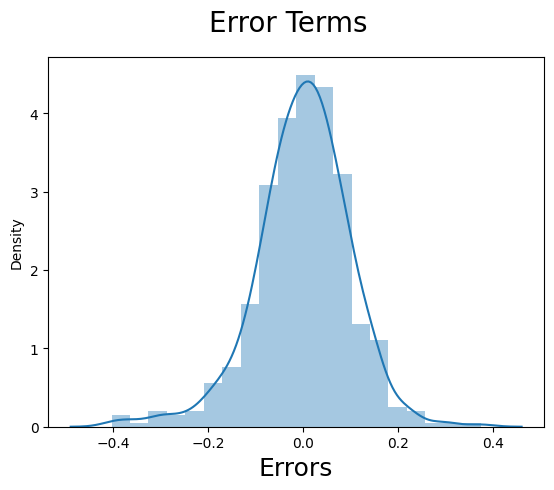

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)         

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [68]:
bikes_test[noncategoricalColums] = minScalar.transform(bikes_test[noncategoricalColums])

In [69]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

Now let's use our model to make predictions.

In [70]:
X_test_new = X_test[X_train_new.columns]
y_test_pred = lm2.predict(sm.add_constant(X_test_new))

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

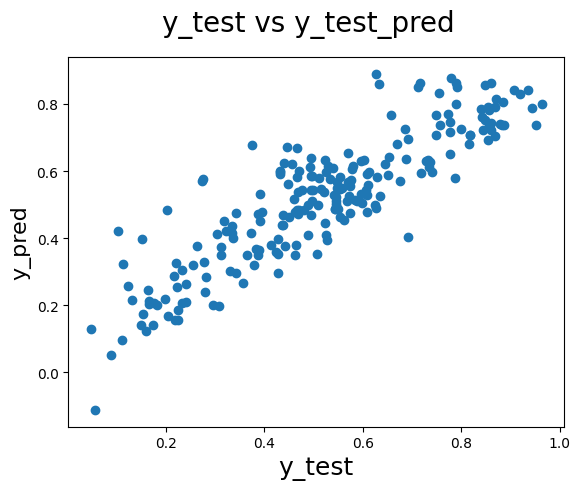

In [71]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)              
plt.ylabel('y_pred', fontsize=16)    

We can see the clearly get the sctter plot has plotted evenly throgh X and Y asis

Let check the R^2 value of both train and test data

In [72]:
# For the test data R2 value is 
r2_score(y_test, y_test_pred)

0.7730493748906679

In [73]:
# For the train data R2 value is
r2_score(y_train, y_train_pred)

0.8031886146883993

In [74]:
lm2.rsquared_adj

0.8000459179169566

Index(['yr', 'holiday', 'atemp', 'windspeed', 'September', 'winter', 'Mist',
       'Light Snow/Rain'],
      dtype='object')